In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
df = pd.read_csv(r'Downloads/heart_attack_indonesia.csv')

In [8]:
df.shape 

(170501, 25)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113873 entries, 1 to 170499
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         113873 non-null  int64  
 1   Age                        113873 non-null  int32  
 2   HeartAttack                113873 non-null  object 
 3   Gender                     113873 non-null  object 
 4   Cholesterol                113873 non-null  int64  
 5   SmokingHabits              113873 non-null  object 
 6   PhysicalActivity           113873 non-null  object 
 7   BMI                        113873 non-null  float64
 8   Hypertension               113873 non-null  object 
 9   Diabetes                   113873 non-null  object 
 10  AlcoholConsumption         113873 non-null  object 
 11  DietType                   113873 non-null  object 
 12  OccupationType             113873 non-null  object 
 13  StressLevel                113873 

In [122]:
df.head

<bound method NDFrame.head of             ID  Age HeartAttack  Gender  Cholesterol SmokingHabits  \
1            2   15         Yes  Female          201    Non-smoker   
3            4   31          No    Male          287        Smoker   
5            6   34          No  Female          195    Non-smoker   
6            7   24          No    Male          193        Smoker   
7            8   60          No  Female          170        Smoker   
...        ...  ...         ...     ...          ...           ...   
170494  170495   25         Yes    Male          180    Non-smoker   
170495  170496   47          No    Male          245    Non-smoker   
170496  170497   23          No    Male          295        Smoker   
170497  170498   25         Yes    Male          172    Non-smoker   
170499  170500   57          No    Male          150        Smoker   

       PhysicalActivity   BMI Hypertension Diabetes  ... State_jakarta  \
1                  High  26.9           No      Yes  ..

In [124]:
# Remove duplicates
df = df.drop_duplicates()
print(df)

            ID  Age HeartAttack  Gender  Cholesterol SmokingHabits  \
1            2   15         Yes  Female          201    Non-smoker   
3            4   31          No    Male          287        Smoker   
5            6   34          No  Female          195    Non-smoker   
6            7   24          No    Male          193        Smoker   
7            8   60          No  Female          170        Smoker   
...        ...  ...         ...     ...          ...           ...   
170494  170495   25         Yes    Male          180    Non-smoker   
170495  170496   47          No    Male          245    Non-smoker   
170496  170497   23          No    Male          295        Smoker   
170497  170498   25         Yes    Male          172    Non-smoker   
170499  170500   57          No    Male          150        Smoker   

       PhysicalActivity   BMI Hypertension Diabetes  ... State_jakarta  \
1                  High  26.9           No      Yes  ...         False   
3          

In [36]:
df = df.dropna()
print(df)

            ID     State  Age HeartAttack  Gender  Cholesterol SmokingHabits  \
1            2  Makassar   15         Yes  Female          201    Non-smoker   
3            4    Malang   31          No    Male          287        Smoker   
5            6      Bali   34          No  Female          195    Non-smoker   
6            7  Surabaya   24          No    Male          193        Smoker   
7            8   Bandung   60          No  Female          170        Smoker   
...        ...       ...  ...         ...     ...          ...           ...   
170494  170495  Semarang   25         Yes    Male          180    Non-smoker   
170495  170496     Medan   47          No    Male          245    Non-smoker   
170496  170497  Semarang   23          No    Male          295        Smoker   
170497  170498    Malang   25         Yes    Male          172    Non-smoker   
170499  170500   Bandung   57          No    Male          150        Smoker   

       PhysicalActivity   BMI Hypertens

In [116]:
# Convert data type of a column
df['Age'] = df['Age'].astype(int)
print(df)


            ID  Age HeartAttack  Gender  Cholesterol SmokingHabits  \
1            2   15         Yes  Female          201    Non-smoker   
3            4   31          No    Male          287        Smoker   
5            6   34          No  Female          195    Non-smoker   
6            7   24          No    Male          193        Smoker   
7            8   60          No  Female          170        Smoker   
...        ...  ...         ...     ...          ...           ...   
170494  170495   25         Yes    Male          180    Non-smoker   
170495  170496   47          No    Male          245    Non-smoker   
170496  170497   23          No    Male          295        Smoker   
170497  170498   25         Yes    Male          172    Non-smoker   
170499  170500   57          No    Male          150        Smoker   

       PhysicalActivity   BMI Hypertension Diabetes  ... State_jakarta  \
1                  High  26.9           No      Yes  ...         False   
3          

In [40]:
# Convert text to lower case
df['State'] = df['State'].str.lower()
print(df)


            ID     State  Age HeartAttack  Gender  Cholesterol SmokingHabits  \
1            2  makassar   15         Yes  Female          201    Non-smoker   
3            4    malang   31          No    Male          287        Smoker   
5            6      bali   34          No  Female          195    Non-smoker   
6            7  surabaya   24          No    Male          193        Smoker   
7            8   bandung   60          No  Female          170        Smoker   
...        ...       ...  ...         ...     ...          ...           ...   
170494  170495  semarang   25         Yes    Male          180    Non-smoker   
170495  170496     medan   47          No    Male          245    Non-smoker   
170496  170497  semarang   23          No    Male          295        Smoker   
170497  170498    malang   25         Yes    Male          172    Non-smoker   
170499  170500   bandung   57          No    Male          150        Smoker   

       PhysicalActivity   BMI Hypertens

In [106]:
#drop NaN values
df.dropna(inplace=True)

In [42]:
from scipy import stats

# Calculate Z-scores
df['z_score'] = stats.zscore(df['Age'])

# Filter out outliers based on Z-score
df = df[(df['z_score'] < 3) & (df['z_score'] > -3)]
print(df)


            ID     State  Age HeartAttack  Gender  Cholesterol SmokingHabits  \
1            2  makassar   15         Yes  Female          201    Non-smoker   
3            4    malang   31          No    Male          287        Smoker   
5            6      bali   34          No  Female          195    Non-smoker   
6            7  surabaya   24          No    Male          193        Smoker   
7            8   bandung   60          No  Female          170        Smoker   
...        ...       ...  ...         ...     ...          ...           ...   
170494  170495  semarang   25         Yes    Male          180    Non-smoker   
170495  170496     medan   47          No    Male          245    Non-smoker   
170496  170497  semarang   23          No    Male          295        Smoker   
170497  170498    malang   25         Yes    Male          172    Non-smoker   
170499  170500   bandung   57          No    Male          150        Smoker   

       PhysicalActivity   BMI Hypertens

In [110]:
# One-hot encode categorical data
#df = pd.get_dummies(df, columns=['State'])
#print(df)


In [48]:
# Check for unique values in a column
if df['Age'].nunique() != len(df):
    print("There are duplicate ages in the dataset.")


There are duplicate ages in the dataset.


In [114]:
df.describe()

,ID,Age,Cholesterol,BMI,SleepHours,AirQualityIndex
count,113873.000000,113873.000000,113873.000000,113873.000000,113873.000000,113873.000000
mean,85192.190475,39.548980,224.482643,26.505070,6.507410,174.650479
std,49284.141062,14.414976,43.193212,4.903292,1.442637,72.137688
min,2.000000,15.000000,150.000000,18.000000,4.000000,50.000000
25%,42413.000000,27.000000,187.000000,22.300000,5.300000,112.000000
50%,85168.000000,40.000000,224.000000,26.500000,6.500000,175.000000
75%,127979.000000,52.000000,262.000000,30.800000,7.800000,237.000000
max,170500.000000,64.000000,299.000000,35.000000,9.000000,299.000000


In [54]:
# Calculate the average age of individuals with heart attacks
average_age = df['Age'].mean()

print(f"The average age of individuals who have had a heart attack is {average_age:.2f} years.")


The average age of individuals who have had a heart attack is 39.55 years.


In [56]:
average_cholesterol_consumption = df['Cholesterol'].mean()
print(f"The average cholesterol consumption in Indonesia is {average_cholesterol_consumption:.2f} mg/day.")


The average cholesterol consumption in Indonesia is 224.48 mg/day.


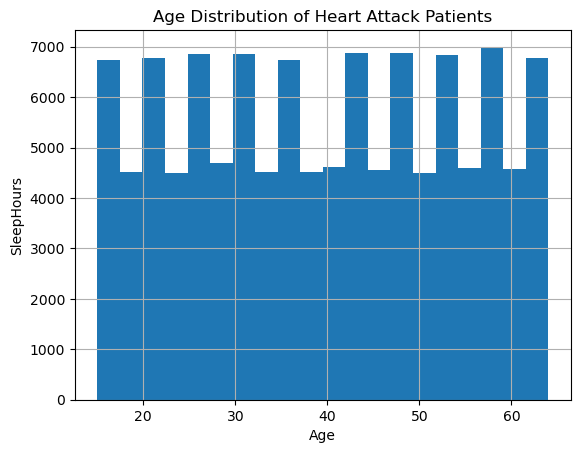

In [60]:

# Histogram of age distribution
df['Age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('SleepHours')
plt.title('Age Distribution of Heart Attack Patients')
plt.show()



In [12]:
# Calculate the minimum BMI
min_bmi = df['BMI'].min()

print(f"The minimum BMI in Indonesia is {min_bmi:.2f}.")
# Calculate the Maximum BMI
min_bmi = df['BMI'].max()

print(f"The maximum BMI in Indonesia is {min_bmi:.2f}.")
min_bmi = df['BMI'].max()

print(f"The maximum BMI in Indonesia is {min_bmi:.2f}.")






The minimum BMI in Indonesia is 18.00.
The maximum BMI in Indonesia is 35.00.


In [32]:
# Calculate the average sleeping hours
average_sleeping_hours = df['SleepHours'].mean()

print(f"The Average sleeping hours in Indonesia is {average_sleeping_hours:.2f} hours per night.")

# Calculate the Minimum sleeping hours
average_sleeping_hours = df['SleepHours'].min()

print(f"The Minimum sleeping hours in Indonesia is {average_sleeping_hours:.2f} hours per night.")

# Calculate the Maximum Sleeping hours
average_sleeping_hours = df['SleepHours'].max()

print(f"The Maximum sleeping hours in Indonesia is {average_sleeping_hours:.2f} hours per night.")


The Average sleeping hours in Indonesia is 6.50 hours per night.
The Minimum sleeping hours in Indonesia is 4.00 hours per night.
The Maximum sleeping hours in Indonesia is 9.00 hours per night.


In [24]:
# Calculate the average Air Quality Index (assuming the column is named 'Air_Quality_Index')
average_air_quality_index = df['AirQualityIndex'].mean()

print(f"The average Air Quality Index in Indonesia is {average_air_quality_index:.2f}.")

# Calculate the minimum Air Quality 
average_air_quality_index = df['AirQualityIndex'].min()
print(f"The minimum Air Quality Index in Indonesia is {average_air_quality_index:.2f}.")
# Calculate the Maximum Air Quality 
average_air_quality_index = df['AirQualityIndex'].max()

print(f"The maximum Air Quality Index in Indonesia is {average_air_quality_index:.2f}.")



The average Air Quality Index in Indonesia is 174.80.
The minimum Air Quality Index in Indonesia is 50.00.
The maximum Air Quality Index in Indonesia is 299.00.


In [92]:
# Calculate the average cholesterol level by gender
average_cholesterol_by_gender = df.groupby('Gender')['Cholesterol'].mean()

print("Average Cholesterol Level by Gender:")
print(average_cholesterol_by_gender)


Average Cholesterol Level by Gender:
Gender
Female    224.510001
Male      224.454989
Name: Cholesterol, dtype: float64


In [94]:
# Calculate the average sleeping hours by gender
average_sleeping_hours_by_gender = df.groupby('Gender')['SleepHours'].mean()

print("Average Sleeping Hours by Gender:")
print(average_sleeping_hours_by_gender)


Average Sleeping Hours by Gender:
Gender
Female    6.507440
Male      6.507379
Name: SleepHours, dtype: float64


In [134]:
# Calculate the average BMI by gender
average_bmi_by_gender = df.groupby('Gender')['BMI'].mean()

print("Average BMI by Gender:")
print(average_bmi_by_gender)


Average BMI by Gender:
Gender
Female    26.501314
Male      26.508866
Name: BMI, dtype: float64


In [18]:
average_cholesterol_consumption = df['Cholesterol'].mean()
print(f"The average cholesterol consumption in Indonesia is {average_cholesterol_consumption:.2f} mg/day.")

average_cholesterol_consumption = df['Cholesterol'].min()
print(f"The minimum cholesterol consumption in Indonesia is {average_cholesterol_consumption:.2f} mg/day.")

average_cholesterol_consumption = df['Cholesterol'].max()
print(f"The maximum cholesterol consumption in Indonesia is {average_cholesterol_consumption:.2f} mg/day.")

The average cholesterol consumption in Indonesia is 224.53 mg/day.
The minimum cholesterol consumption in Indonesia is 150.00 mg/day.
The maximum cholesterol consumption in Indonesia is 299.00 mg/day.


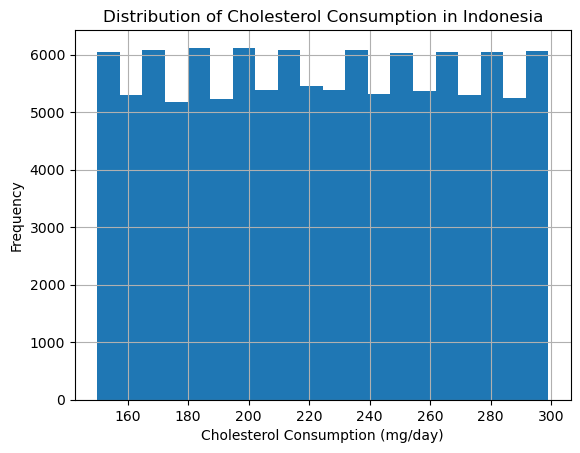

In [146]:
df['Cholesterol'].hist(bins=20)
plt.xlabel('Cholesterol Consumption (mg/day)')
plt.ylabel('Frequency')
plt.title('Distribution of Cholesterol Consumption in Indonesia')
plt.show()
